In [1]:
import pickle
import numpy as np
from corner import corner, hist2d
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
samples = [pickle.load(open(f'flare{idx}_samples.p', 'rb')) for idx in range(5)]

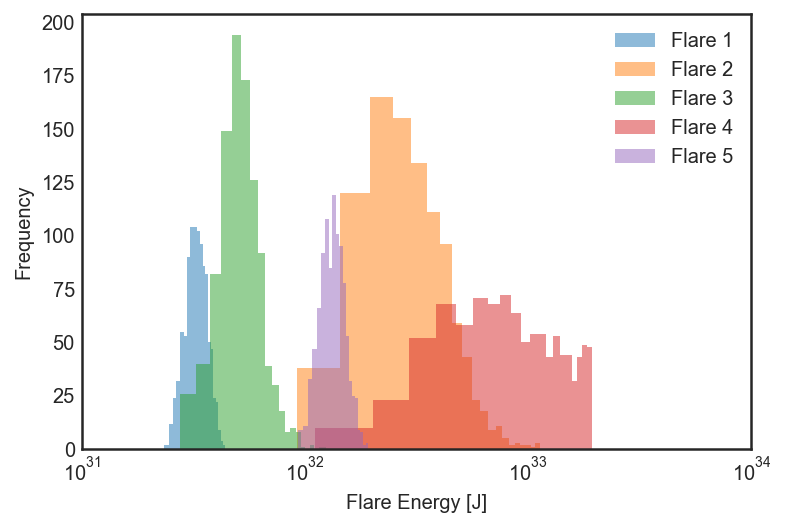

In [3]:
# import astropy.units as u
# r = 0.8
# unit = u.joule * u.day * u.nm/(u.s * u.m**3)
# const = ((np.pi * (r * u.solRad)**2) * unit).to(u.joule)

fig, ax = plt.subplots(facecolor='w')
[ax.hist(np.asarray(samples[idx].energy), 20, alpha=0.5, label=f'Flare {idx+1}') for idx in range(5)]
ax.set(xscale=('log'), xlabel=('Flare Energy [J]'), ylabel=('Frequency'), xlim=(1e31, 1e34))
plt.legend()
#plt.yscale('log')
plt.savefig('energy.pdf', bbox_inches='tight')

In [6]:
for idx in range(5):
    samples[idx]['log_amp'] = np.log10(samples[idx]['amp'])
    samples[idx]['log_e'] = np.log10(np.asarray(samples[idx].energy))

In [7]:
te_r = (np.min([samples[idx].te.min() for idx in range(4)])*0.9, np.max([samples[idx].te.max() for idx in range(5)]) * 1.1)
tg_r = (np.min([samples[idx].tg.min() for idx in range(4)])*0.9, np.max([samples[idx].tg.max() for idx in range(5)]) * 1.1)
log_a_r = (np.min([samples[idx].log_amp.min() for idx in range(4)])*1.1, np.max([samples[idx].log_amp.max() for idx in range(5)]) * 0.9)
log_e_r = (np.min([samples[idx].log_e.min() for idx in range(4)])*0.98, np.max([samples[idx].log_e.max() for idx in range(5)]) * 1.02)

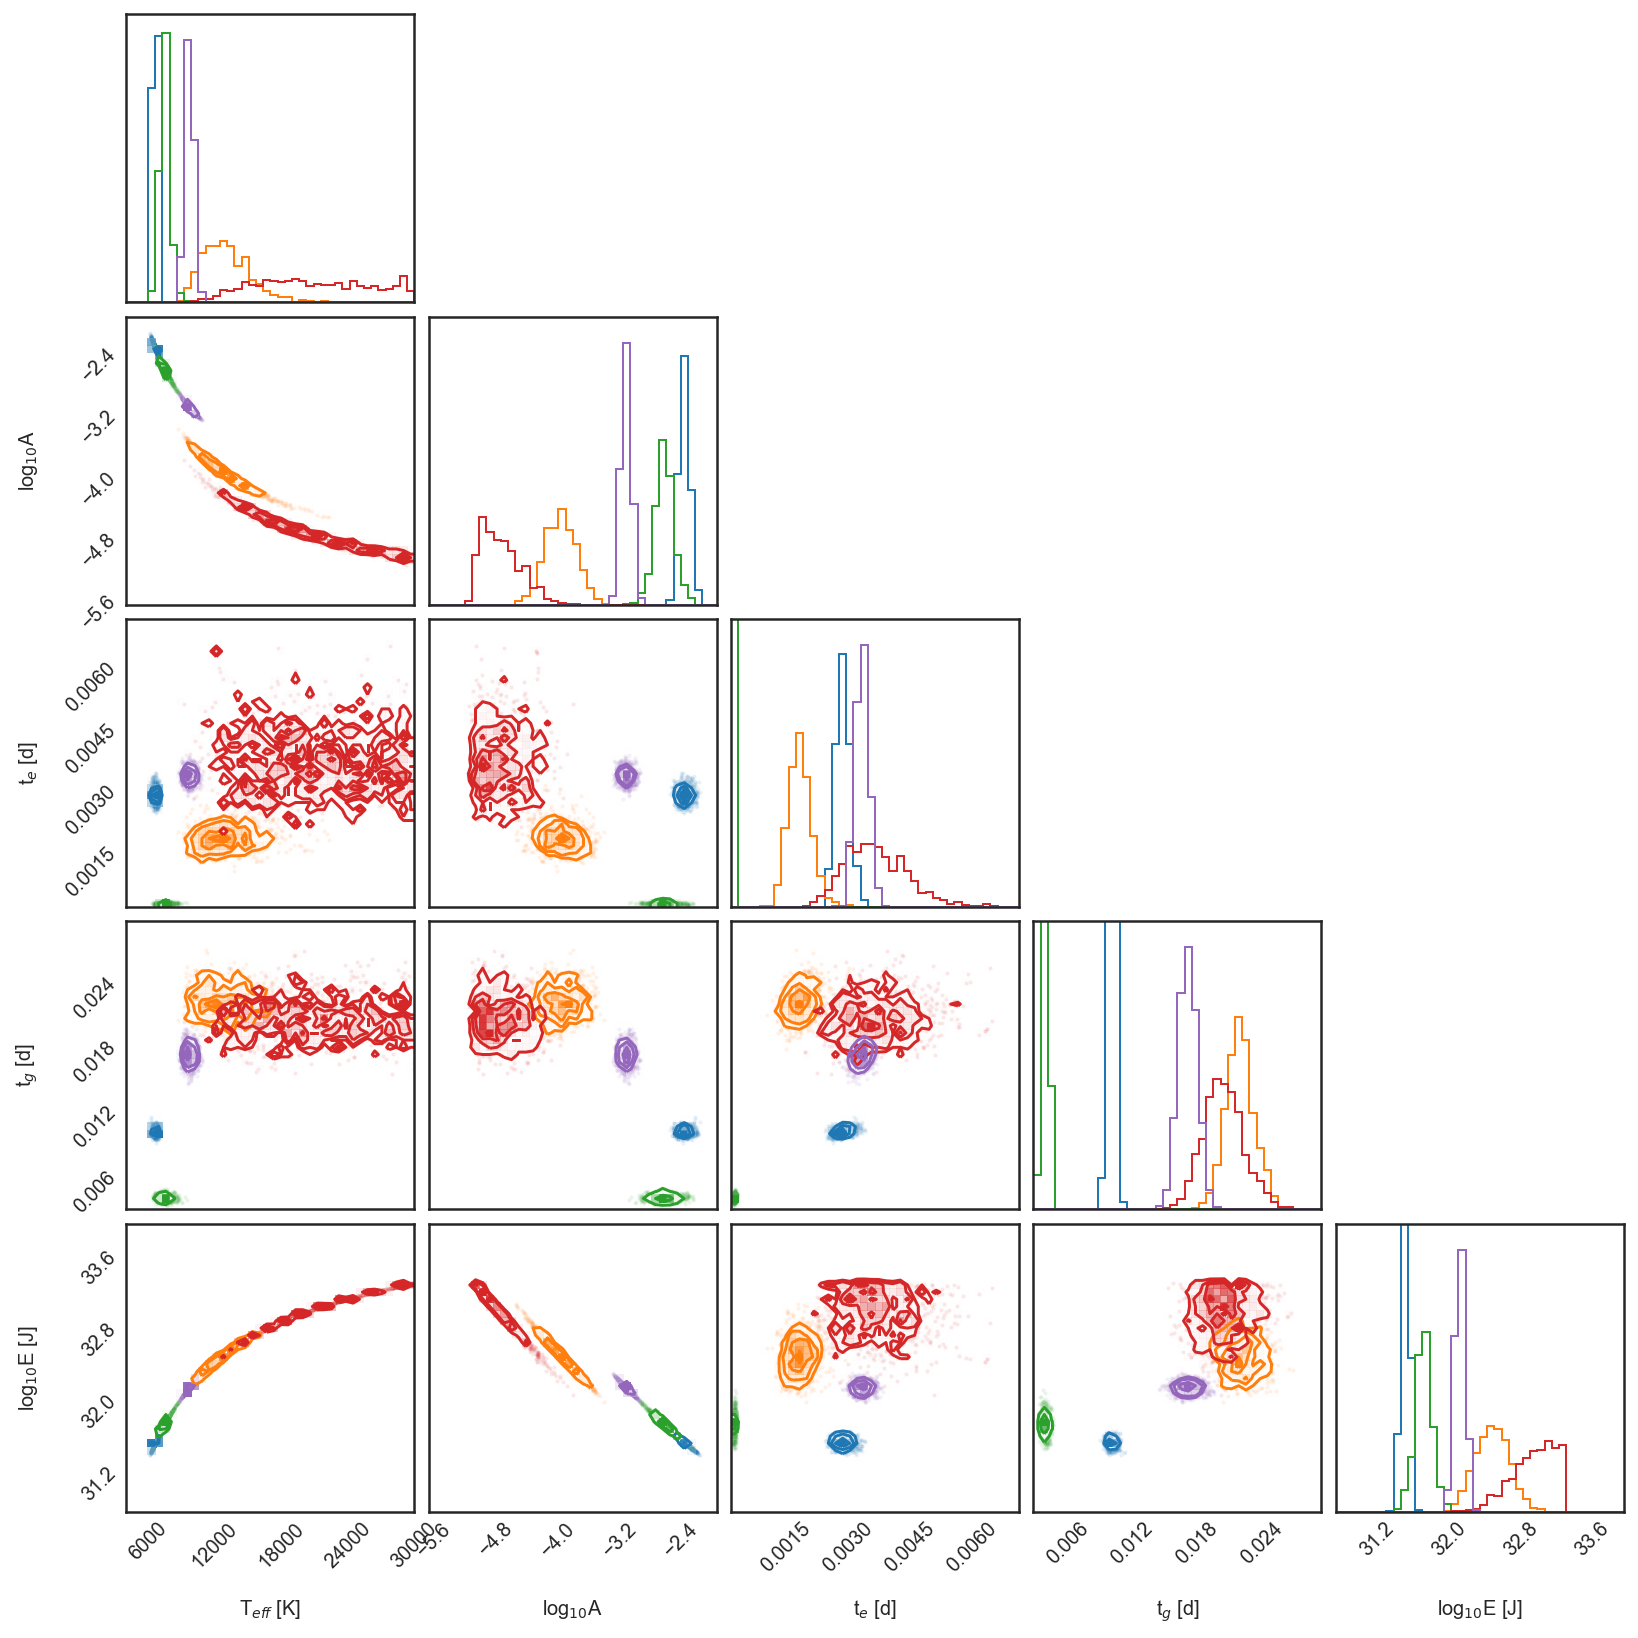

In [8]:
fig = corner(samples[0][['teff_flare', 'log_amp', 'te', 'tg', 'log_e']],
             labels=['T$_{eff}$ [K]', 'log$_{10}$A', 't$_e$ [d]', 't$_g$ [d]', 'log$_{10}$E [J]'], 
             color='C0',
             range=[(4000, 30000), log_a_r, te_r, tg_r, log_e_r], bins=40)
[corner(samples[idx][['teff_flare', 'log_amp', 'te', 'tg', 'log_e']],
        labels=['T$_{eff}$ [K]', 'log$_{10}$A', 't$_e$ [d]', 't$_g$ [d]', 'log$_{10}$E [J]'], 
        fig=fig, color=f'C{idx}',
        range=[(4000, 30000), log_a_r, te_r, tg_r, log_e_r], bins=40) for idx in np.arange(1, 5)]
plt.savefig('corner.pdf', bbox_inches='tight')

In [ ]:
# Need an HR diagram of CoRoT multband photometry